In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
keras.__version__

'2.4.3'

In [4]:
train_data_path = "C:/Users/nandi/Desktop/tensorflow/model_leaf/maize dataset/train"
validation_data_path = "C:/Users/nandi/Desktop/tensorflow/model_leaf/maize dataset/val"
 

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [7]:
training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 2509 images belonging to 4 classes.


In [8]:
training_data.class_indices

{'Blight': 0, 'corn_common_rust': 1, 'corn_gray_spot': 2, 'healthy': 3}

In [9]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 94 images belonging to 4 classes.


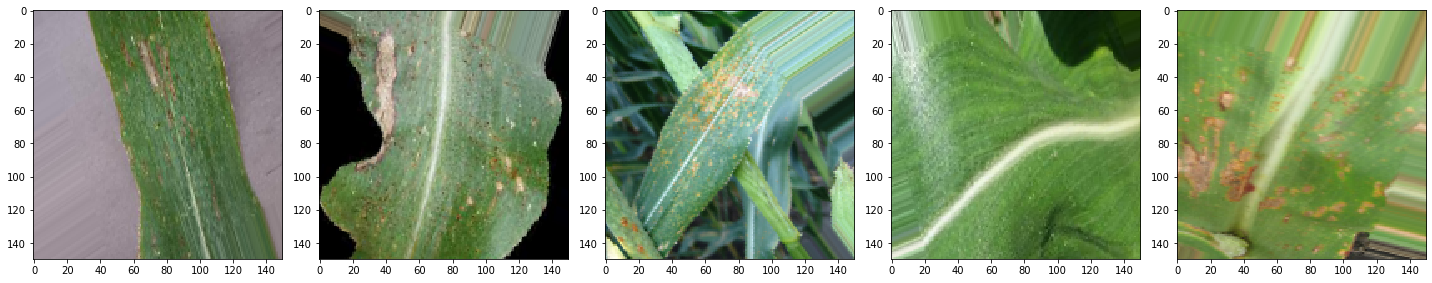

In [12]:
images = [training_data[i][0][0] for i in range(5)]
plotImages(images)

In [13]:
model_path = 'C:/Users/nandi/Desktop/tensorflow/model_leaf/v3_red_cott_dis.h5'

In [14]:
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [15]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

In [16]:
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/500
79/79 [==============================] - 70s 880ms/step - loss: 1.2892 - accuracy: 0.3530 - val_loss: 0.8270 - val_accuracy: 0.5745

Epoch 00001: val_accuracy improved from -inf to 0.57447, saving model to C:/Users/nandi/Desktop/tensorflow/model_leaf\v3_red_cott_dis.h5
Epoch 2/500
79/79 [==============================] - 55s 697ms/step - loss: 0.8298 - accuracy: 0.6405 - val_loss: 0.7045 - val_accuracy: 0.6596

Epoch 00002: val_accuracy improved from 0.57447 to 0.65957, saving model to C:/Users/nandi/Desktop/tensorflow/model_leaf\v3_red_cott_dis.h5
Epoch 3/500
79/79 [==============================] - 55s 689ms/step - loss: 0.7010 - accuracy: 0.6814 - val_loss: 0.7306 - val_accuracy: 0.7021

Epoch 00003: val_accuracy improved from 0.65957 to 0.70213, saving model to C:/Users/nandi/Desktop/tensorflow/model_leaf\v3_red_cott_dis.h5
Epoch 4/500
79/79 [==============================] - 58s 733ms/step - loss: 0.6300 - accuracy: 0.7247 - val_loss: 0.6637 - val_accuracy: 0.6702

Epo

79/79 [==============================] - 48s 600ms/step - loss: 0.3476 - accuracy: 0.8735 - val_loss: 0.2894 - val_accuracy: 0.8617

Epoch 00039: val_accuracy did not improve from 0.90426
Epoch 40/500
79/79 [==============================] - 48s 603ms/step - loss: 0.3161 - accuracy: 0.8790 - val_loss: 0.3194 - val_accuracy: 0.8617

Epoch 00040: val_accuracy did not improve from 0.90426
Epoch 41/500
79/79 [==============================] - 49s 613ms/step - loss: 0.3745 - accuracy: 0.8613 - val_loss: 0.3166 - val_accuracy: 0.8404

Epoch 00041: val_accuracy did not improve from 0.90426
Epoch 42/500
79/79 [==============================] - 47s 593ms/step - loss: 0.3694 - accuracy: 0.8486 - val_loss: 0.2413 - val_accuracy: 0.8617

Epoch 00042: val_accuracy did not improve from 0.90426
Epoch 43/500
79/79 [==============================] - 48s 605ms/step - loss: 0.3351 - accuracy: 0.8617 - val_loss: 0.2922 - val_accuracy: 0.8617

Epoch 00043: val_accuracy did not improve from 0.90426
Epoch 44

79/79 [==============================] - 46s 581ms/step - loss: 0.2595 - accuracy: 0.8937 - val_loss: 0.2197 - val_accuracy: 0.8723

Epoch 00079: val_accuracy did not improve from 0.92553
Epoch 80/500
79/79 [==============================] - 47s 588ms/step - loss: 0.2602 - accuracy: 0.8946 - val_loss: 0.2443 - val_accuracy: 0.8723

Epoch 00080: val_accuracy did not improve from 0.92553
Epoch 81/500
79/79 [==============================] - 48s 601ms/step - loss: 0.2569 - accuracy: 0.9020 - val_loss: 0.2756 - val_accuracy: 0.8723

Epoch 00081: val_accuracy did not improve from 0.92553
Epoch 82/500
79/79 [==============================] - 48s 608ms/step - loss: 0.2732 - accuracy: 0.8965 - val_loss: 0.2102 - val_accuracy: 0.8830

Epoch 00082: val_accuracy did not improve from 0.92553
Epoch 83/500
79/79 [==============================] - 47s 593ms/step - loss: 0.2368 - accuracy: 0.9018 - val_loss: 0.2635 - val_accuracy: 0.8404

Epoch 00083: val_accuracy did not improve from 0.92553
Epoch 84

79/79 [==============================] - 46s 582ms/step - loss: 0.2184 - accuracy: 0.9140 - val_loss: 0.2579 - val_accuracy: 0.9043

Epoch 00120: val_accuracy did not improve from 0.92553
Epoch 121/500
79/79 [==============================] - 46s 580ms/step - loss: 0.2145 - accuracy: 0.9119 - val_loss: 0.2206 - val_accuracy: 0.8936

Epoch 00121: val_accuracy did not improve from 0.92553
Epoch 122/500
79/79 [==============================] - 46s 576ms/step - loss: 0.2373 - accuracy: 0.9095 - val_loss: 0.2267 - val_accuracy: 0.8830

Epoch 00122: val_accuracy did not improve from 0.92553
Epoch 123/500
79/79 [==============================] - 45s 573ms/step - loss: 0.2099 - accuracy: 0.9156 - val_loss: 0.1947 - val_accuracy: 0.9149

Epoch 00123: val_accuracy did not improve from 0.92553
Epoch 124/500
79/79 [==============================] - 45s 564ms/step - loss: 0.2195 - accuracy: 0.9077 - val_loss: 0.2040 - val_accuracy: 0.9043

Epoch 00124: val_accuracy did not improve from 0.92553
Epoc

KeyboardInterrupt: 

In [25]:
import numpy as np
def model_predict(img_path, model):
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
   

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
   # x = preprocess_input(x)

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    return preds

In [26]:
from tensorflow.keras.models import load_model
model = load_model("v3_red_cott_dis.h5")

In [27]:
from tensorflow.keras.preprocessing import image
pp=model_predict("Corn_Blight (6).jpg",model)
print(pp)

Corn_Blight (6).jpg


ValueError: in user code:

    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:425 call
        inputs, training=training, mask=mask)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 12544 but received input with shape (None, 36864)
